<center>  
<h1>Lab 2 – Probability and Statistics</h1>
<h4>Submitted by Beena Kurian(8946601)</h4>
<center>


#### OBJECTIVE OF THE LAB: 
* The concept of probability and statistical measures to classify the data as spam or not spam.
* Clean the data by removing the outliers using measures of central tendency and dispersion.

# Part A

### Preprocessing


IMPORT THE NECESSARY LIBRARIES

In [1936]:
# importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### PREPROCESSING

In [1937]:
#Loading dataset Lab2_dataset.csv
spam_df = pd.read_csv('C:/Users/beena/conestoga_aiml/aia/Fall2023/practical_labs/datasets/Lab_2/Lab2_dataset.csv')

# First 3 rows
spam_df.head(3)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0


In [1938]:
# independent variable X is 'text'
X = spam_df['text']

# dependent variable y is 'label'
y = spam_df['label']

Use the function in sklearn to transform the "text" feature to a vector representation

In [1939]:
#Use the function in sklearn to transform the "text" feature to a vector representation of a predetermined size.
vectorizer = CountVectorizer(max_features=8000)
X = vectorizer.fit_transform(X)

In [1940]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### MODEL TRAINING AND EVALUATION

SVC

In [1941]:
# Train the Sklearn SVC model on the training dataset and evaluate on the test set
model1 = SVC()
model1.fit(X_train, y_train)
svc_predict = model1.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)

GAUSSIAN NAIVE BAYES MODEL

In [1942]:
# Train and predict using the Gaussian Naive Bayes model
model2 = GaussianNB()
model2.fit(X_train.toarray(), y_train)
gaussian_pred = model2.predict(X_test.toarray())
gaussian_pred_accuracy = accuracy_score(y_test, gaussian_pred)

MULTINOMIAL NAIVE BAYES MODEL

In [1943]:
# Train and predict using Multinomial Naive Bayes model
model3 = MultinomialNB()
model3.fit(X_train, y_train)
multinomial_pred = model3.predict(X_test)
multinomial_pred_acc = accuracy_score(y_test, multinomial_pred)

### COMPARISON OF SVC, GAUSSIAN, AND MULTINOMINAL MODELS

In [1944]:
print("MODEL-1 :         Accuracy when using SVM:", svc_accuracy)
print("-----------------------------------------------------------------------------")
print(classification_report(y_test, svc_predict))
confusion_mat = confusion_matrix(y_test, svc_predict)
TP = confusion_mat[1, 1]
TN = confusion_mat[0, 0]
FP = confusion_mat[0, 1]
FN = confusion_mat[1, 0]
print(" TP = ", TP, "|   TN =", TN , "|   FP =", FP ,"|   FN =", FN)

MODEL-1 :         Accuracy when using SVM: 0.9497584541062802
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

         ham       0.97      0.95      0.96       732
        spam       0.90      0.94      0.92       303

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035

 TP =  284 |   TN = 699 |   FP = 33 |   FN = 19


In [1945]:
print("MODEL-2 : Accuracy when using Gaussian Naive Bayes:", gaussian_pred_accuracy)
print("-----------------------------------------------------------------------------")
print(classification_report(y_test, gaussian_pred))
confusion_mat = confusion_matrix(y_test, gaussian_pred)
TP = confusion_mat[1, 1]
TN = confusion_mat[0, 0]
FP = confusion_mat[0, 1]
FN = confusion_mat[1, 0]
print(" TP = ", TP, "|   TN =", TN , "|   FP =", FP ,"|   FN =", FN)

MODEL-2 : Accuracy when using Gaussian Naive Bayes: 0.9719806763285024
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       732
        spam       0.94      0.97      0.95       303

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035

 TP =  293 |   TN = 713 |   FP = 19 |   FN = 10


In [1946]:
print("MODEL-3 : Accuracy when using Multinomial Naive Bayes Accuracy:", multinomial_pred_acc)
print("-----------------------------------------------------------------------------")
print(classification_report(y_test, multinomial_pred))
confusion_mat = confusion_matrix(y_test, multinomial_pred)
TP = confusion_mat[1, 1]
TN = confusion_mat[0, 0]
FP = confusion_mat[0, 1]
FN = confusion_mat[1, 0]
print(" TP = ", TP, "|   TN =", TN , "|   FP =", FP ,"|   FN =", FN)

MODEL-3 : Accuracy when using Multinomial Naive Bayes Accuracy: 0.9565217391304348
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

         ham       0.98      0.96      0.97       732
        spam       0.90      0.95      0.93       303

    accuracy                           0.96      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035

 TP =  289 |   TN = 701 |   FP = 31 |   FN = 14


### COMPARISON OF THREE MODELS

* SVM achieved an accuracy of approximately 94.98% on the email spam/ham dataset.
* Gaussian Naive Bayes achieved the highest accuracy, approximately 97.20%, among the three models.
* Multinomial Naive Bayes achieved an accuracy of approximately 95.65% on the dataset, it had a slightly lower accuracy compared to Gaussian Naive Bayes but still outperformed SVM in terms of accuracy.
* But, this accuracy will change if 'max_features' parameter changed in CountVectoriser.
* The max_features parameter determines the maximum number of features to include in the vocabulary based on their frequency. 
* I have experimented with various parameter values(max_features), and selected the one which produced highest accuracy.

## PART B

### PREPROCESSING

LOADING DATASET

In [1947]:
#Loading dataset
stay_df = pd.read_csv('C:/Users/beena/conestoga_aiml/aia/Fall2023/practical_labs/datasets/Lab_2/AB_NYC_2019.csv')
stay_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


HISTOGRAM REPRESENTING PRICE (ACTUAL DATASET)

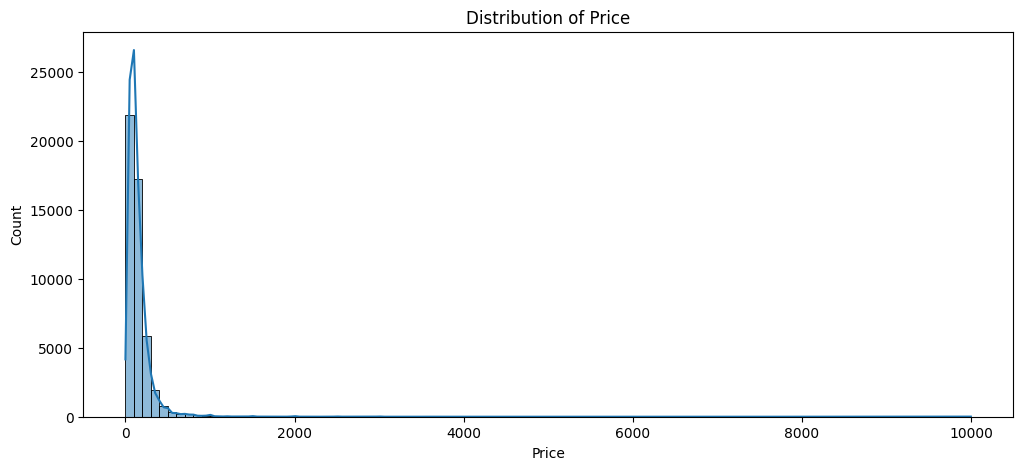

In [1948]:
# Creating a histogram of Price
plt.figure(figsize=(12, 5))
X=stay_df['price']
sns.histplot(X,bins=100,kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

## CALCULATING Z-SCORE & REMOVING OUTLIERS

In [1949]:
# Calculate Z-scores for the 'price' column
z_score = np.abs(stats.zscore(X))
print("Length of actual datset= ", len(stay_df))

# Setting a threshold 2 to identify outliers 
threshold1 = 2.0

# Dataset after removing some outliers 
stay_df_new1 = stay_df[(z_score <= threshold1)]
print("Length of new dataset after removing some outliers using zscore = ",len(stay_df_new1))


Length of actual datset=  48895
Length of new dataset after removing some outliers using zscore =  48128


HISTOGRAM REPRESENTING PRICE (AFTER REMOVING OUTLIERS USING Z-SCORE APPROACH)

<Axes: xlabel='price', ylabel='Count'>

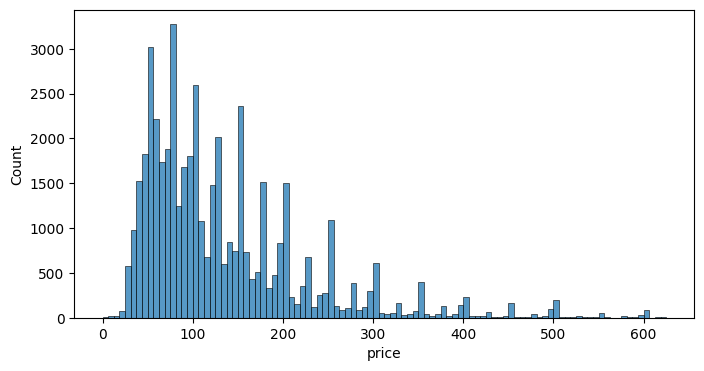

In [1950]:
# Creating a histogram of Price after outlier removal
plt.figure(figsize=(8, 4))
X_new1=stay_df_new1['price']
sns.histplot(X_new1,bins =100)

## CALCULATING WHISKERS & REMOVING OUTLIERS

In [1951]:
print("Length of actual datset=", len(stay_df))

# Use the whiskers approach to identify and remove outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
LW = Q1 - 1.5 * IQR
HW = Q3 + 1.5 * IQR
stay_df_new2 = stay_df[(X >= LW) & (X <= HW)]
print("Length of new datset after removing outliers using Whiskers Approach=", len(stay_df_new2))

Length of actual datset= 48895
Length of new datset after removing outliers using Whiskers Approach= 45923


<Axes: xlabel='price', ylabel='Count'>

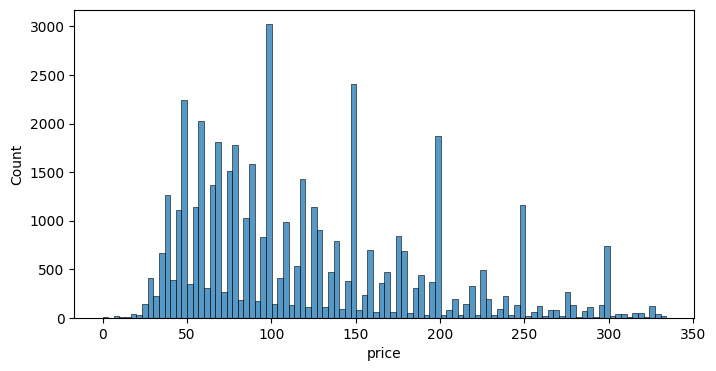

In [1952]:
# Creating a histogram of Price after outlier removal
plt.figure(figsize=(8, 4))
X_new2=stay_df_new2['price']
sns.histplot(X_new2, bins =100)

In [1953]:
# Comparison of both methods
print("Rows in the actual dataset :", len(stay_df))

# Row data when z-score method used
print("Rows after removing outliers using Z-score with threshold 2 : ", len(stay_df_new1))
print("Total Rows removed :", len(stay_df)-len(stay_df_new1))

# Row data when whisker method used
print("Rows after removing outliers using Whiskers approach : ", len(stay_df_new2))
print("Total Rows removed :", len(stay_df)-len(stay_df_new2))

Rows in the actual dataset : 48895
Rows after removing outliers using Z-score with threshold 2 :  48128
Total Rows removed : 767
Rows after removing outliers using Whiskers approach :  45923
Total Rows removed : 2972


### COMPARISON BETWEEN Z-SCORE & WHISKER APPROACH

In the analysis of a dataset containing 48,895 rows, two different outlier removal approaches were employed: 
* Z-score with a threshold of 2 
* Whiskers approach. 

#### The Z-score Approach
* This is a commonly used method for outlier detection, however demonstrated limitations in this dataset. 
* Setting the threshold to 2.0 resulted in the removal of 767 rows. 
* In my opinion, this approach is less effective in identifying outliers, potentially due to the dataset's right-skewed distribution.
* I have also tried with different thresholds like 0.5,0.8,1.0,1.5, and 3.0. 
* This method perform approximately similar way as whisker approach, if threshold is between 0.5-1.0.
* However, this method is more suitable for normally distributed datasets. 

#### Whisker Approach
* The whiskers approach to determine outlier bounds is an alternative solution that proved effective in this case. 
* It resulted in the removal of approximately 2,972 rows, which is more than the Z-score approach 
* This approach still preserves a substantial portion of the dataset
* This approach is less dependent on the skewness of the data distribution, making it a suitable choice for this type of dataset.



Box plot visualizations below shows dataset before and after outlier removal using both approaches

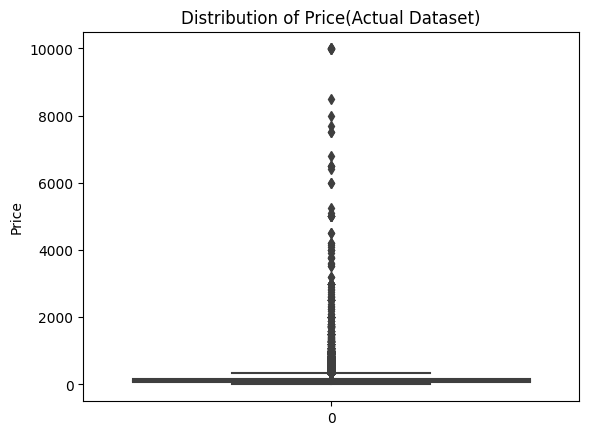

In [1954]:
sns.boxplot(X)
plt.title('Distribution of Price(Actual Dataset)')
plt.ylabel('Price')
plt.show()

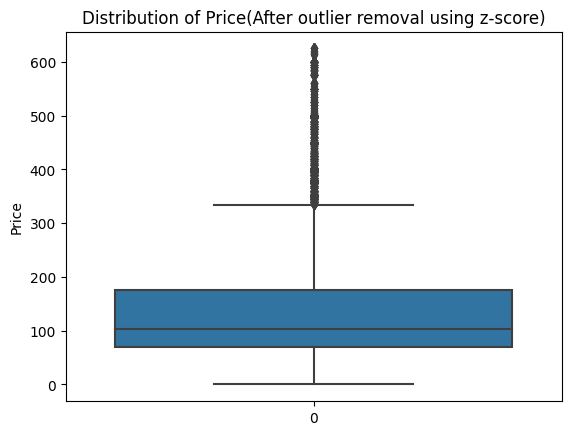

In [1955]:
# Box plot of dataset after outlier removal using z-score method
sns.boxplot(X_new1)
plt.title('Distribution of Price(After outlier removal using z-score)')
plt.ylabel('Price')
plt.show()

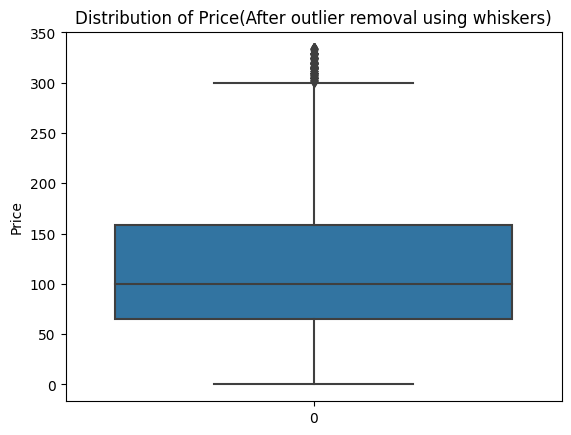

In [1956]:
# Box plot of dataset after outlier removal using whisker method
sns.boxplot(X_new2)
plt.title('Distribution of Price(After outlier removal using whiskers)')
plt.ylabel('Price')
plt.show()